In [97]:
import pandas as pd
import numpy as np
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings('ignore')

ori_train_df = pd.read_csv('./preprocess_mecab_train.csv')
train_df = ori_train_df.copy()
# train_df['documentId'] = train_df.index
# train_df[['documentId', 'invention_title', 'abstract', 'claims']].to_csv('./train_test.csv')
category_df = pd.read_csv('./baseline/category.csv')
category_df['SSno'] = category_df['SSno'].apply(lambda x: f'{x:05d}')

category = category_df.set_index('SSno')['LLno'].to_dict()
ssname = category_df.set_index('SSno')['SStext'].to_dict()

In [98]:
# Multi Label로 라벨링 되어 있는 것을 단일 라벨로 변경

expanded_rows = []
for _, row in train_df.iterrows():
    labels = row['SSnos'].split(' ')
    for label in labels:
        new_row = row.copy()
        new_row['SSnos'] = label
        expanded_rows.append(new_row)
        
# 새로운 데이터 프레임 생성
train_df = pd.DataFrame(expanded_rows).reset_index(drop=True)

In [99]:
train_df

,documentId,invention_title,abstract,claims,SSnos
0,kr19910011048y1,콤팩트 디스크 를 동기 녹음회로,"이 고안 은 CD 가 장착 된 녹음장치 에 관한 것 으로서 , 더욱 상세 하 게 는...","카세트 테이프 플레이어 와 CD 플레이어 가 일체 화 된 장치 에서 , 녹음키 가 ...",26521
1,kr19910015448a,녹음 테이프 의 비 정상 더빙 부위 소거방법,"본 발명 은 테이프 음 의 더빙 에 관한 것 으로 , 일반 적 으로 사용 되 고 있...",재생 테이프 의 곡 을 녹음 테이프 로 더빙시 재생 테이프 가 먼저 끝나 면 더 빙...,59120
2,kr19910017768a,브이씨알 의 영상 더빙 자동 기록 제어장치 및 방법,본 발명 의 브이씨알 의 영상 더빙 자동 기록 제어장치 및 방법 은 재생 되 는 영...,마이콤 의 출력단자 와 앤드게이트 의 출력단자 를 오아게이트 를 통해 모드판별부 의...,59120
3,kr19910022167b1,영상기록재생장치 의 더빙회로,영상기록재생장치 의 더빙회로 는 한 채널 의 영상신호 를 소거 하 여 다른 원 하 ...,두 개 의 기록재생헤드 와 두 개 의 소거헤드 를 구비 한 영상기록 재생장치 에 있...,59120
4,kr19910023691a,캠코더 의 오디오 더빙회로,"본 발명 은 8 MM 캠코더 의 더 빙 및 재생 제어 회로 에 관한 것 으로 , 현...","외부마이크 로 의 신호 나 라인 음성신호 를 FM 변조처리 함 과 아울러 , 재생신...",59120
...,...,...,...,...,...
71656,kr20217028291a,가금 류 의 장각부 를 발골 하 기 위한 시스템 및 방법,"적어도 하나 의 뼈 및 상기 뼈 를 둘러싸 는 살코기 를 포함 하 는 , 가금 류 ...","적어도 하나 의 뼈 및 상기 뼈 를 둘러싸 는 살코기 를 포함 하 는 , 가금 류 ...",10121
71657,kr20217028452a,도금 강판,"이 도금 강판 은 , 강판 과 , 상기 강판 의 표면 의 적어도 일부 에 형성 된 ...","강판 과 , 상기 강판 의 표면 의 적어도 일부 에 형성 된 도금 층 을 갖 고 ,...",24191
71658,kr20217028893a,"전처리용 혼합 교반기 , 석고 슬러리 제조 장치 , 건축 용 면 재 제조 장치 , ...",소석고 와 물 을 혼련 하 여 석고 슬러리 로 하 는 슬러리 형성 용 혼합 교반기 ...,소석고 와 물 을 혼련 하 여 석고 슬러리 로 하 는 슬러리 형성 용 혼합 교반기 ...,23323
71659,kr20217029041a,플루오로락톤 및 그 제조 방법,"본 개시 는 , 헥사플루오 로 프로필렌옥시드 등 으로부터 1 공정 에서 플루오로락톤...","식 로 표시 되 는 화합물 의 제조 방법 이 며 , 식 로 표시 되 는 화합물 과 ...",20119


In [100]:
train_df['ipc_section'] = train_df['SSnos'].apply(lambda x: category[x])
train_df['SSnos'] = train_df['SSnos'].astype(np.int64)
train_df

,documentId,invention_title,abstract,claims,SSnos,ipc_section
0,kr19910011048y1,콤팩트 디스크 를 동기 녹음회로,"이 고안 은 CD 가 장착 된 녹음장치 에 관한 것 으로서 , 더욱 상세 하 게 는...","카세트 테이프 플레이어 와 CD 플레이어 가 일체 화 된 장치 에서 , 녹음키 가 ...",26521,C
1,kr19910015448a,녹음 테이프 의 비 정상 더빙 부위 소거방법,"본 발명 은 테이프 음 의 더빙 에 관한 것 으로 , 일반 적 으로 사용 되 고 있...",재생 테이프 의 곡 을 녹음 테이프 로 더빙시 재생 테이프 가 먼저 끝나 면 더 빙...,59120,J
2,kr19910017768a,브이씨알 의 영상 더빙 자동 기록 제어장치 및 방법,본 발명 의 브이씨알 의 영상 더빙 자동 기록 제어장치 및 방법 은 재생 되 는 영...,마이콤 의 출력단자 와 앤드게이트 의 출력단자 를 오아게이트 를 통해 모드판별부 의...,59120,J
3,kr19910022167b1,영상기록재생장치 의 더빙회로,영상기록재생장치 의 더빙회로 는 한 채널 의 영상신호 를 소거 하 여 다른 원 하 ...,두 개 의 기록재생헤드 와 두 개 의 소거헤드 를 구비 한 영상기록 재생장치 에 있...,59120,J
4,kr19910023691a,캠코더 의 오디오 더빙회로,"본 발명 은 8 MM 캠코더 의 더 빙 및 재생 제어 회로 에 관한 것 으로 , 현...","외부마이크 로 의 신호 나 라인 음성신호 를 FM 변조처리 함 과 아울러 , 재생신...",59120,J
...,...,...,...,...,...,...
71656,kr20217028291a,가금 류 의 장각부 를 발골 하 기 위한 시스템 및 방법,"적어도 하나 의 뼈 및 상기 뼈 를 둘러싸 는 살코기 를 포함 하 는 , 가금 류 ...","적어도 하나 의 뼈 및 상기 뼈 를 둘러싸 는 살코기 를 포함 하 는 , 가금 류 ...",10121,C
71657,kr20217028452a,도금 강판,"이 도금 강판 은 , 강판 과 , 상기 강판 의 표면 의 적어도 일부 에 형성 된 ...","강판 과 , 상기 강판 의 표면 의 적어도 일부 에 형성 된 도금 층 을 갖 고 ,...",24191,C
71658,kr20217028893a,"전처리용 혼합 교반기 , 석고 슬러리 제조 장치 , 건축 용 면 재 제조 장치 , ...",소석고 와 물 을 혼련 하 여 석고 슬러리 로 하 는 슬러리 형성 용 혼합 교반기 ...,소석고 와 물 을 혼련 하 여 석고 슬러리 로 하 는 슬러리 형성 용 혼합 교반기 ...,23323,C
71659,kr20217029041a,플루오로락톤 및 그 제조 방법,"본 개시 는 , 헥사플루오 로 프로필렌옥시드 등 으로부터 1 공정 에서 플루오로락톤...","식 로 표시 되 는 화합물 의 제조 방법 이 며 , 식 로 표시 되 는 화합물 과 ...",20119,C


<Axes: >

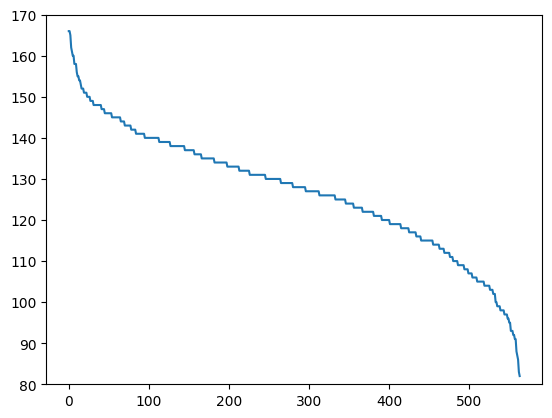

In [101]:
# 데이터 불균형 시각화

train_df['SSnos'].value_counts().sort_values(ascending=False).reset_index(drop=True).plot(ylim=(80, 170))

In [102]:
def resample_df(df, total_size=10000):
    X = df.index.values.reshape(-1, 1)
    y = df['SSnos'].values

    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    upsample_num = total_size // len(y_resampled) + 1
    # X_resampled = np.concatenate([X_resampled for _ in range(upsample_num)]).reshape(-1)
    # y_resampled = np.concatenate([y_resampled for _ in range(upsample_num)])
    X_resampled = X_resampled.reshape(-1)

    ratio = (len(y_resampled) - total_size) / len(y_resampled)
    X, _, y, _ = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=ratio, random_state=42)

    # return df.loc[X].reset_index(drop=True)
    return df.loc[X_resampled].reset_index(drop=True)

In [103]:
train_df = resample_df(train_df, 70000)
train_df['SSnos'] = train_df['SSnos'].apply(lambda x: f'{x:05d}')

<Axes: >

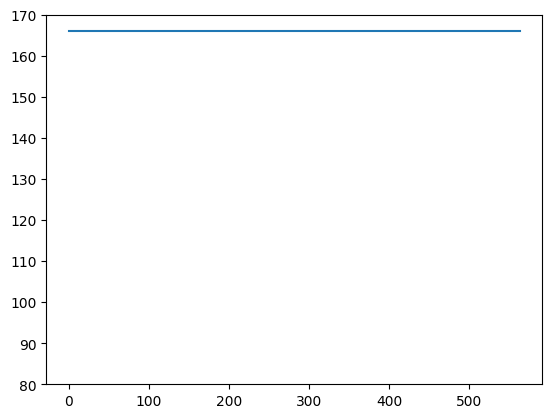

In [105]:
# 데이터 불규현 해소 시각화

train_df['SSnos'].value_counts().sort_values(ascending=False).reset_index(drop=True).plot(ylim=(80, 170))

In [106]:
# 같은 text를 가진 데이터 라벨 병합, 중복되는 라벨 없도록 병합

def combine_without_duplicated(dup_df):
    ls = []
    while True:
        if len(dup_df)==0:
            break
        nondup_df = dup_df[~dup_df.duplicated()]
        dup_df = dup_df[dup_df.duplicated()]
        ls.append(nondup_df.groupby(['documentId', 'invention_title', 'abstract', 'claims'])['SSnos'].apply(' '.join).reset_index(drop=False))
    return pd.concat(ls).reset_index(drop=True)

In [107]:
train_df = combine_without_duplicated(train_df)

In [66]:
train_df.to_csv('./balanced_preprocess_mecab_train_full.csv', index=False)